In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io
import os

In [2]:
data_root = 'C:\COCHE_Project\MMBP\data\MMData'
## The list of subject number.
sub_id = list(os.walk(data_root))[0][1]

In [47]:
Rest1 = scipy.io.loadmat('..\data\MMData\\17\processed_rest1.mat')['processed_rest1']
print(Rest1.shape[1])
Sig = Rest1[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.2, 0.2, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.85, 0.85, Sig_norm_0)
Rest1[2, :] = Sig_norm_1
sig = Rest1[3, :]
cutoff_frequency = 0.5  # Cutoff frequency in Hz
order = 2  # Filter order
sample_rate = 2000
# Create the high-pass filter
b, a = signal.butter(order, cutoff_frequency, btype='high', fs=sample_rate)
filtered_signal = signal.filtfilt(b, a, sig)
Rest1[3, :] = filtered_signal


CT = scipy.io.loadmat('..\data\MMData\\17\processed_ct.mat')['processed_ct']
print(CT.shape[1])
Sig = CT[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
ppg_max = 0.3#np.max(Sig_filtered)
ppg_min =-0.3#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.25, 0.25, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.75, 0.75, Sig_norm_0)
CT[2, :] = Sig_norm_1
sig = CT[3, :]
cutoff_frequency = 0.5  # Cutoff frequency in Hz
order = 2  # Filter order
sample_rate = 2000
# Create the high-pass filter
b, a = signal.butter(order, cutoff_frequency, btype='high', fs=sample_rate)
filtered_signal = signal.filtfilt(b, a, sig)
filtered_signal = filtered_signal*0.75
CT[3, :] = filtered_signal

Re = scipy.io.loadmat('..\data\MMData\\17\processed_re.mat')['processed_re']
print(Re.shape[1])
Sig = Re[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.19, 0.19, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.8, 0.8, Sig_norm_0)
Re[2, :] = Sig_norm_1
sig = Re[3, :]
cutoff_frequency = 0.5  # Cutoff frequency in Hz
order = 2  # Filter order
sample_rate = 2000
# Create the high-pass filter
b, a = signal.butter(order, cutoff_frequency, btype='high', fs=sample_rate)
filtered_signal = signal.filtfilt(b, a, sig)
Re[3, :] = filtered_signal

Rest2 = scipy.io.loadmat('..\data\MMData\\17\processed_rest2.mat')['processed_rest2']
print(Rest2.shape[1])
Sig = Rest2[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.2, 0.2, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.8, 0.8, Sig_norm_0)
Rest2[2, :] = Sig_norm_1
sig = Rest2[3, :]
cutoff_frequency = 0.5  # Cutoff frequency in Hz
order = 2  # Filter order
sample_rate = 2000
# Create the high-pass filter
b, a = signal.butter(order, cutoff_frequency, btype='high', fs=sample_rate)
filtered_signal = signal.filtfilt(b, a, sig)
Rest2[3, :] = filtered_signal

All = np.concatenate((Rest1, CT, Re, Rest2), axis=1)

263200
126200
725400
249800


In [64]:
min_value = int(np.min(CT[1, :]))
max_value = int(np.max(CT[1, :]))
step = (max_value - min_value) / 3  # Divide the range into three parts
y = np.arange(min_value, max_value, step)
y

array([ 69.        , 114.66666667, 160.33333333])

In [52]:
y = (f"{min(CT[0, :]):.2f}", f"{max(CT[0, :]):.2f}", 3)
y

('-0.37', '1.66', 3)

1364600


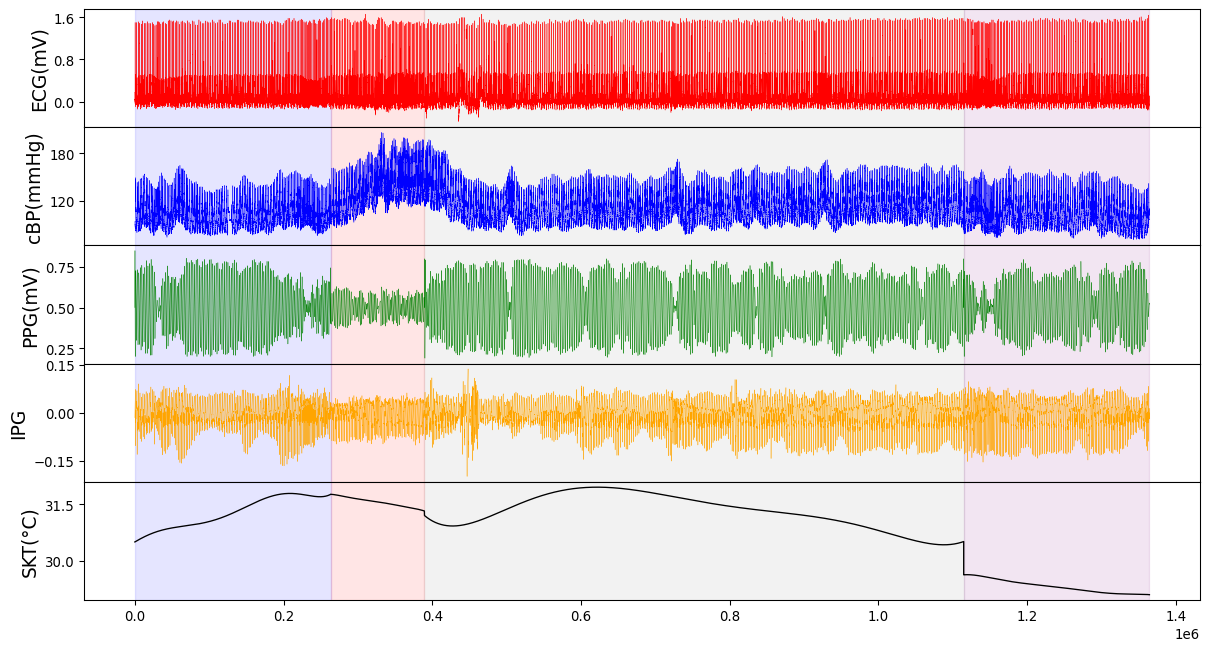

In [70]:
#CT = scipy.io.loadmat('..\data\MMData\\17\processed_ct.mat')['processed_ct']
from matplotlib.ticker import MaxNLocator
CT = All
print(CT.shape[1])
fs=2000
begin_index = 0
end_index = CT.shape[1]
x_values = np.arange(begin_index, end_index, step=200000)  # X-axis values at 0, 20000, 40000, ...
time_values = x_values / fs  # Convert to seconds
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,8),dpi=96)
colors = ['red', 'blue', 'green', 'orange', 'black']
labels = ['ECG(mV)', 'cBP(mmHg)', 'PPG(mV)', 'IPG', 'Temperature(°C)']

for i in range(4):
    axs[i].plot(CT[i, :][begin_index:end_index], color=colors[i], linewidth=0.3)
    axs[i].set_ylabel(labels[i], fontsize=14)
    axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))
    #ax.set_xlabel('Time (s)')
    axs[i].set_xticks(x_values)  # Set X-axis ticks based on x_values
    axs[i].set_xticklabels([f'{int(val/fs)}' for val in x_values], color='white')  # Format X-axis tick labels as time

'''
axs[0].plot(CT[0,:][begin_index:end_index], color='red', linewidth=0.3)
axs[0].set_ylabel('ECG(mV)', fontsize=14)
axs[1].plot(CT[1,:][begin_index:end_index], color='blue', linewidth=0.3)
axs[1].set_ylabel('cBP(mmHg)', fontsize=14)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=1))
axs[2].plot(CT[2,:][begin_index:end_index], color='green', linewidth=0.3)
#axs[2].plot(Sig_norm_1[begin_index:end_index], color='green')
axs[2].set_ylabel('PPG(mV)', fontsize=14)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=4))
axs[3].plot(CT[3,:][begin_index:end_index], color='orange', linewidth=0.3)
axs[3].set_ylabel('IPG', fontsize=14)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=4))'''
axs[4].plot(CT[4,:][begin_index:end_index], color='black', linewidth=1)
axs[4].set_ylabel('SKT(°C)', fontsize=14)
axs[4].yaxis.set_major_locator(MaxNLocator(nbins=3))
fig.subplots_adjust(hspace=0)
regions = [(0, 263200, 'blue', 'Rest1'), (263200, 389400, 'red', 'Cool Test'), (389400, 1114800, 'grey', 'Recovery'), (1114800, CT.shape[1], '#800080', 'Rest2')]
for region in regions:
    for ax in axs:
        ax.axvspan(region[0], region[1], color=region[2], alpha=0.1)
plt.show()



1364600


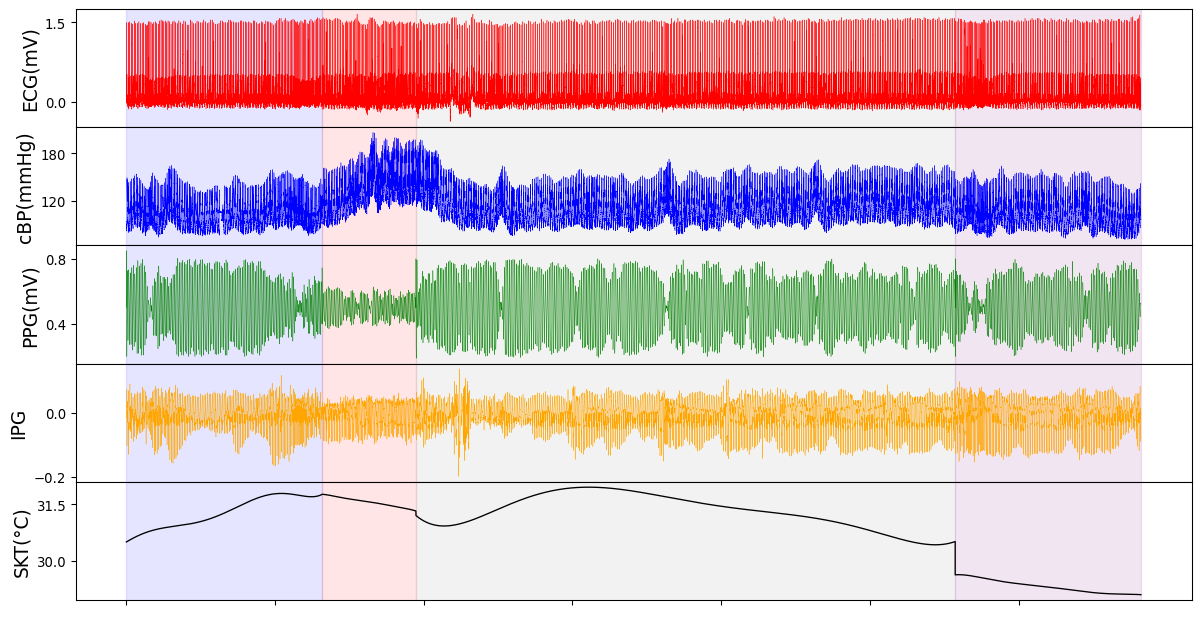

In [77]:
#CT = scipy.io.loadmat('..\data\MMData\\17\processed_ct.mat')['processed_ct']
CT = All
print(CT.shape[1])
fs=2000
begin_index = 0
end_index = CT.shape[1]
x_values = np.arange(begin_index, end_index, step=200000)  # X-axis values at 0, 20000, 40000, ...
time_values = x_values / fs  # Convert to seconds
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,8),dpi=96)
axs[0].plot(CT[0,:][begin_index:end_index], color='red', linewidth=0.3)
axs[0].set_ylabel('ECG(mV)', fontsize=14)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=2))
axs[1].plot(CT[1,:][begin_index:end_index], color='blue', linewidth=0.3)
axs[1].set_ylabel('cBP(mmHg)', fontsize=14)
axs[1].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[2].plot(CT[2,:][begin_index:end_index], color='green', linewidth=0.3)
#axs[2].plot(Sig_norm_1[begin_index:end_index], color='green')
axs[2].set_ylabel('PPG(mV)', fontsize=14)
axs[2].yaxis.set_major_locator(MaxNLocator(nbins=2))
axs[3].plot(CT[3,:][begin_index:end_index], color='orange', linewidth=0.3)
axs[3].set_ylabel('IPG', fontsize=14)
axs[3].yaxis.set_major_locator(MaxNLocator(nbins=2))
axs[4].plot(CT[4,:][begin_index:end_index], color='black', linewidth=1)
axs[4].set_ylabel('SKT(°C)', fontsize=14)
axs[4].yaxis.set_major_locator(MaxNLocator(nbins=3))
fig.subplots_adjust(hspace=0)
#fig.suptitle(f"S{subid} {int(begin_index/fs)} to {int(end_index/fs)} sec", fontsize=16)
regions = [(0, 263200, 'blue', 'Rest1'), (263200, 389400, 'red', 'Cool Test'), (389400, 1114800, 'grey', 'Recovery'), (1114800, CT.shape[1], '#800080', 'Rest2')]
for region in regions:
    for ax in axs:
        ax.axvspan(region[0], region[1], color=region[2], alpha=0.1)
#fig.text(0.22, 0.085, 'Rest1', fontsize=12, color='blue', ha='center')
#fig.text(0.33, 0.085, 'Cool Test', fontsize=12, color='red', ha='center')
#fig.text(0.527, 0.085, 'Recovery', fontsize=12, color='#444444', ha='center')
#fig.text(0.81, 0.085, 'Rest2', fontsize=12, color='#800080', ha='center')

for ax in axs:
    #ax.set_xlabel('Time (s)')
    ax.set_xticks(x_values)  # Set X-axis ticks based on x_values
    ax.set_xticklabels([f'{int(val/fs)}' for val in x_values], color='white')  # Format X-axis tick labels as time
#suptitle = plt.suptitle('Cool Test')
#suptitle.set_y(0.92)
plt.show()



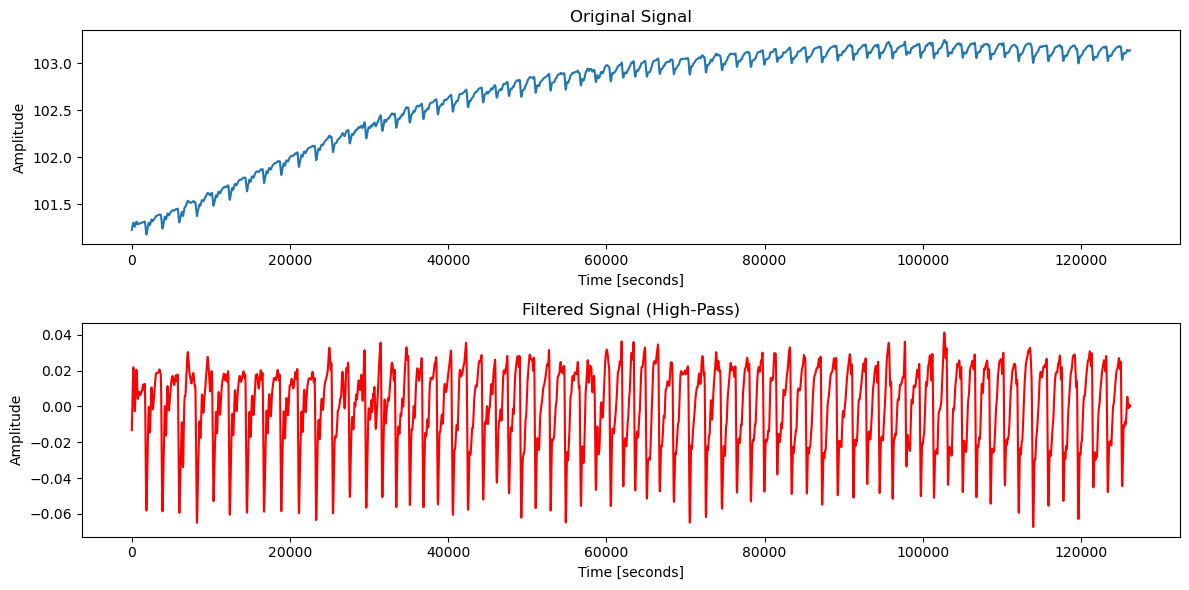

In [19]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
CT = scipy.io.loadmat('..\data\MMData\\17\processed_ct.mat')['processed_ct']
sig = CT[3, :]

# High-pass Butterworth filter parameters
cutoff_frequency = 0.5  # Cutoff frequency in Hz
order = 2  # Filter order
sample_rate = 2000
# Create the high-pass filter
b, a = signal.butter(order, cutoff_frequency, btype='high', fs=sample_rate)

# Apply the filter using filtfilt for zero-phase filtering
filtered_signal = signal.filtfilt(b, a, sig)
filtered_signal = filtered_signal*0.5
# Plotting the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sig, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal, label='Filtered Signal', color='red')
plt.title('Filtered Signal (High-Pass)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


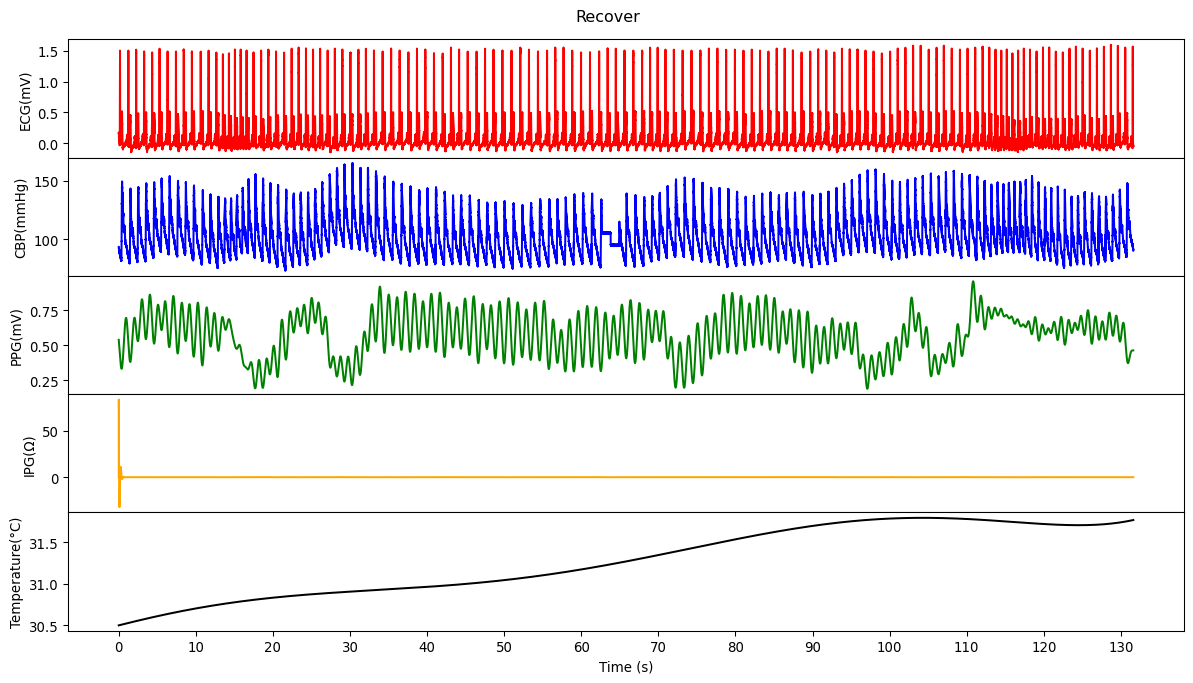

In [5]:
CT = scipy.io.loadmat('..\data\MMData\\17\processed_rest1.mat')['processed_rest1']

Sig = CT[3, :]
lowcut=3
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
'''fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)'''
#ppg_max = 0.2#np.max(Sig_filtered)
#ppg_min =-0.2#np.min(Sig_filtered)
#Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
#Sig_norm_0 = np.where(Sig_norm < 0.15, 0.15, Sig_norm)
#Sig_norm_1 = np.where(Sig_norm_0 > 0.85, 0.85, Sig_norm_0)
CT[3, :] = Sig_filtered
fs=2000
begin_index = 0
end_index = CT.shape[1]
x_values = np.arange(begin_index, end_index, step=20000)  # X-axis values at 0, 20000, 40000, ...
time_values = x_values / fs  # Convert to seconds
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,8),dpi=96)
axs[0].plot(CT[0,:][begin_index:end_index], color='red')
axs[0].set_ylabel('ECG(mV)', position=(0, 500))
axs[1].plot(CT[1,:][begin_index:end_index], color='blue')
axs[1].set_ylabel('CBP(mmHg)')
axs[2].plot(CT[2,:][begin_index:end_index], color='green')
#axs[2].plot(Sig_norm_1[begin_index:end_index], color='green')
axs[2].set_ylabel('PPG(mV)')
axs[3].plot(CT[3,:][begin_index:end_index], color='orange')
axs[3].set_ylabel('IPG(Ω)')
axs[4].plot(CT[4,:][begin_index:end_index], color='black')
axs[4].set_ylabel('Temperature(°C)')
fig.subplots_adjust(hspace=0)
#fig.suptitle(f"S{subid} {int(begin_index/fs)} to {int(end_index/fs)} sec", fontsize=16)
for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_xticks(x_values)  # Set X-axis ticks based on x_values
    ax.set_xticklabels([f'{int(val/fs)}' for val in x_values])  # Format X-axis tick labels as time
suptitle = plt.suptitle('Recover')
suptitle.set_y(0.92)
plt.show()
